EDA (Exploratory Data Analysis)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.metrics import accuracy_score

In [2]:
# Load Dataset
df = pd.read_csv("data/SCMS_Delivery_History_Dataset.csv")

In [3]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [5]:
df.shape

(10324, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [7]:
pd.set_option('display.max_columns', None) # View full extent of dataset (missing columns in view)
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,1138

In [8]:
df.nunique() # Checking for unique values and distribution

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

Checking Values

In [9]:
df.isnull().sum() # checking null values

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [10]:
df.duplicated().sum() # checking data for duplicates

0

In [11]:
obj_columns = [x for x in df.columns if df[x].dtypes == 'object'] # for columns in dataframe with type object

In [12]:
obj_columns

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)']

In [13]:
num_columns = [y for y in df.columns if df[y].dtypes == 'int' or df[y].dtypes =='float'] # for columns in dataframe with type num

In [14]:
num_columns

['Line Item Value', 'Pack Price', 'Unit Price', 'Line Item Insurance (USD)']

Handling Missing Values

In [15]:
missing_df = df[['Shipment Mode','Line Item Insurance (USD)']]

In [16]:
# Using mean and mode to handle missing values
df['Shipment Mode'] = df['Shipment Mode'].fillna(df['Shipment Mode'].mode())
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())
df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])

In [17]:
# Restructuring values in certain columns for better legibility
def reorder(df):
    df_split = df.split(" ")
    df_return = df_split[0]
    return df_return

In [18]:
df['PO / SO #'] = df['PO / SO #'].apply(reorder)
df['ASN/DN #'] = df['ASN/DN #'].apply(reorder)

In [19]:
# Reducing reduntant values into single variable
df['Vendor INCO Term'] = df['Vendor INCO Term'].replace(['DAP','DDU','CIF'],'Others')

In [20]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [21]:
# setting proper datetime data value
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'])

C:\Users\richi\AppData\Local\Temp\ipykernel_9928\1514265349.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
C:\Users\richi\AppData\Local\Temp\ipykernel_9928\1514265349.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])
C:\Users\richi\AppData\Local\Temp\ipykernel_9928\1514265349.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'])


Fixing Unclear Values

In [22]:
# fix weight values in dataframe which is split into various parts

def update_weight(row):
    weight = row['Weight (Kilograms)']
    if 'See' in weight:
        id = weight.split(':')[1].split(')')[0].strip()
        actual_weight = df[df['ID'] == int(id)]['Weight (Kilograms)'].values[0]
        return actual_weight
    else:
        return weight

df['Weight (Kilograms)'] = df.apply(update_weight, axis=1)


In [23]:
# same for freight as above

def update_freight(row):
    cost = row['Freight Cost (USD)']
    if 'See' in cost:
        id = cost.split(':')[1].split(')')[0].strip()
        actual_cost = df[df['ID'] == int(id)]['Freight Cost (USD)'].values[0]
        return actual_cost
    else:
        return cost
    
df['Freight Cost (USD)'] = df.apply(update_freight, axis = 1)

In [24]:
# Fixing datatype issue after applying

df['Freight Cost (USD)'] = df['Freight Cost (USD)'].replace('Freight Included in Commodity Cost',0)
df = df[df['Freight Cost (USD)'] != 'Invoiced Separately']
df = df[df['Weight (Kilograms)'] != 'Weight Captured Separately']
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].astype(float)
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].astype(float)

In [25]:
# dropping column as it is no longer required
df = df.drop('ID', axis=1)

In [26]:
countries_table = pd.crosstab(df['Country'],df['Fulfill Via'])
print(countries_table)

Fulfill Via         Direct Drop  From RDC
Country                                  
Afghanistan                   3         0
Angola                        4         3
Benin                         3         9
Botswana                     57         7
Burundi                      24        68
Cameroon                     48        18
Congo, DRC                  102       190
Côte d'Ivoire               245       811
Dominican Republic           20        25
Ethiopia                     86       118
Ghana                        33        15
Guatemala                     3         7
Guinea                        1         0
Guyana                       87       140
Haiti                       286       310
Kenya                        75        18
Lesotho                       2         0
Liberia                       6         0
Libya                         0         8
Malawi                       14         0
Mali                         14         0
Mozambique                   98   

Creating Target Varaible from Data (Calculating from given Data)

In [27]:
consignment_price = df['Line Item Value'] + df['Freight Cost (USD)'] + df['Line Item Insurance (USD)']
df['Consignment_price'] = consignment_price

Data Visualization

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


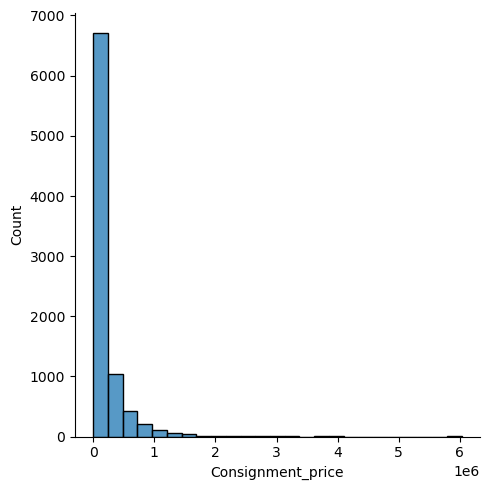

In [28]:
sns.displot(df['Consignment_price'], bins = 25)

([<matplotlib.patches.Wedge at 0x2c1c1c0ae10>,
 [Text(-0.819634783908732, 1.4320261244149448, 'Air'),
  Text(0.26129510386341936, -1.6291792009159107, 'Truck'),
  Text(1.462327751020528, -0.7642627484021746, 'Air Charter'),
  Text(1.6379811440805572, -0.19879077351967087, 'Ocean')],
 [Text(-0.4470735184956719, 0.7811051587717879, '66.5%'),
  Text(0.14252460210731963, -0.8886432004995874, '22.0%'),
  Text(0.7976333187384695, -0.41687059003754967, '7.6%'),
  Text(0.8934442604075765, -0.10843133101072953, '3.8%')])

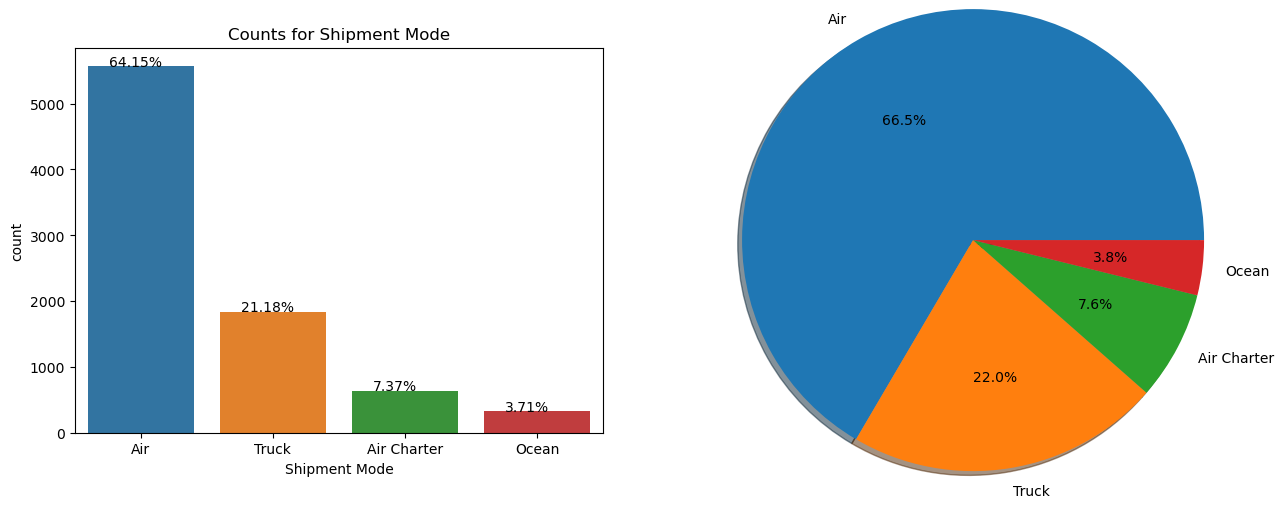

In [29]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)

ax = sns.countplot(x='Shipment Mode', data=df)
total = df.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
plt.title("Counts for Shipment Mode")
plt.xlabel('Shipment Mode')

ax = fig.add_subplot(122)
lbs = ['Air', 'Truck', 'Air Charter', 'Ocean']
plt.pie(df['Shipment Mode'].value_counts(), labels=lbs, autopct='%1.1f%%', shadow=True, radius=1.5)



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


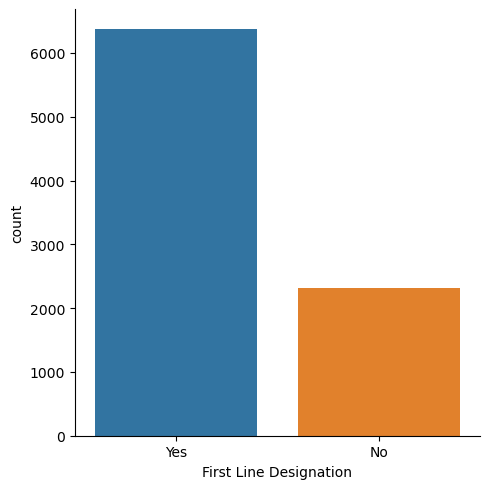

In [30]:
ax = sns.catplot(data=df, x = 'First Line Designation', kind='count')

In [31]:
def barplot(data, cols):
    plt.figure(figsize=(25, 10))
    data.value_counts().plot(kind='bar')
    plt.title("Barplot for {}".format(cols))
    plt.show()


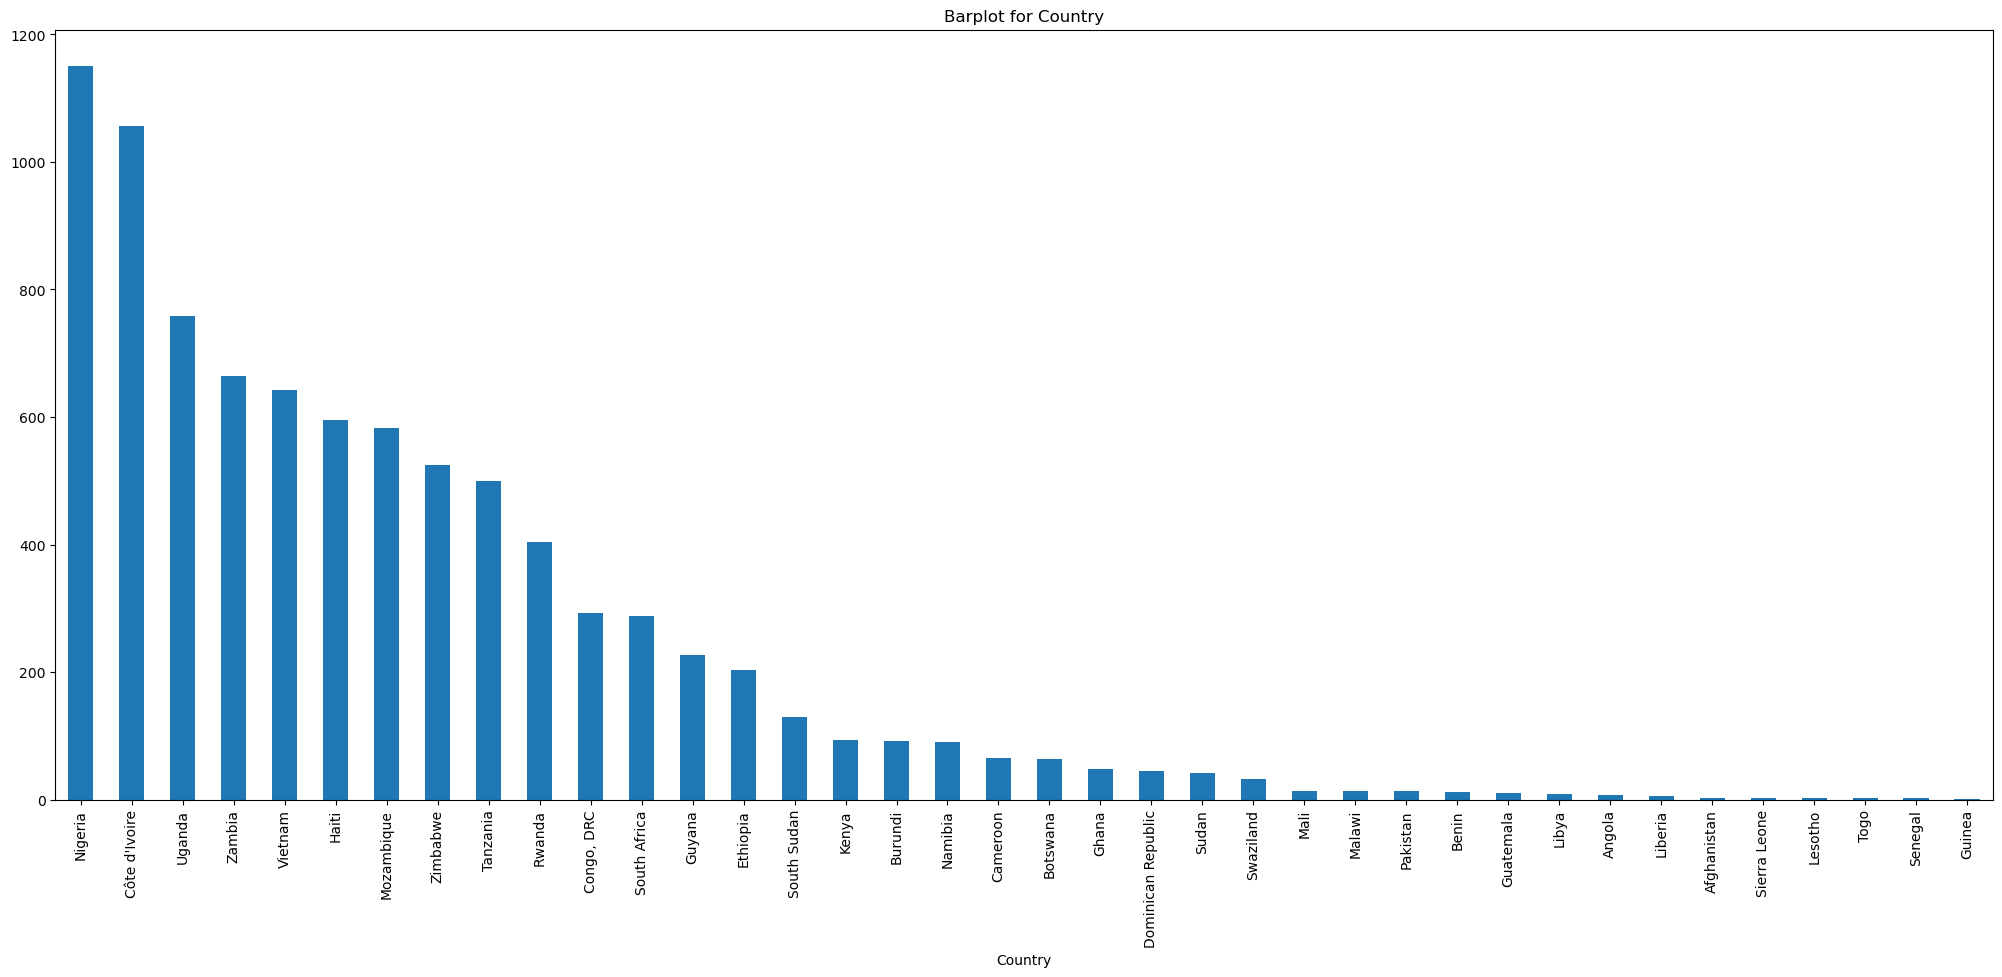

In [32]:
barplot(df['Country'],"Country")

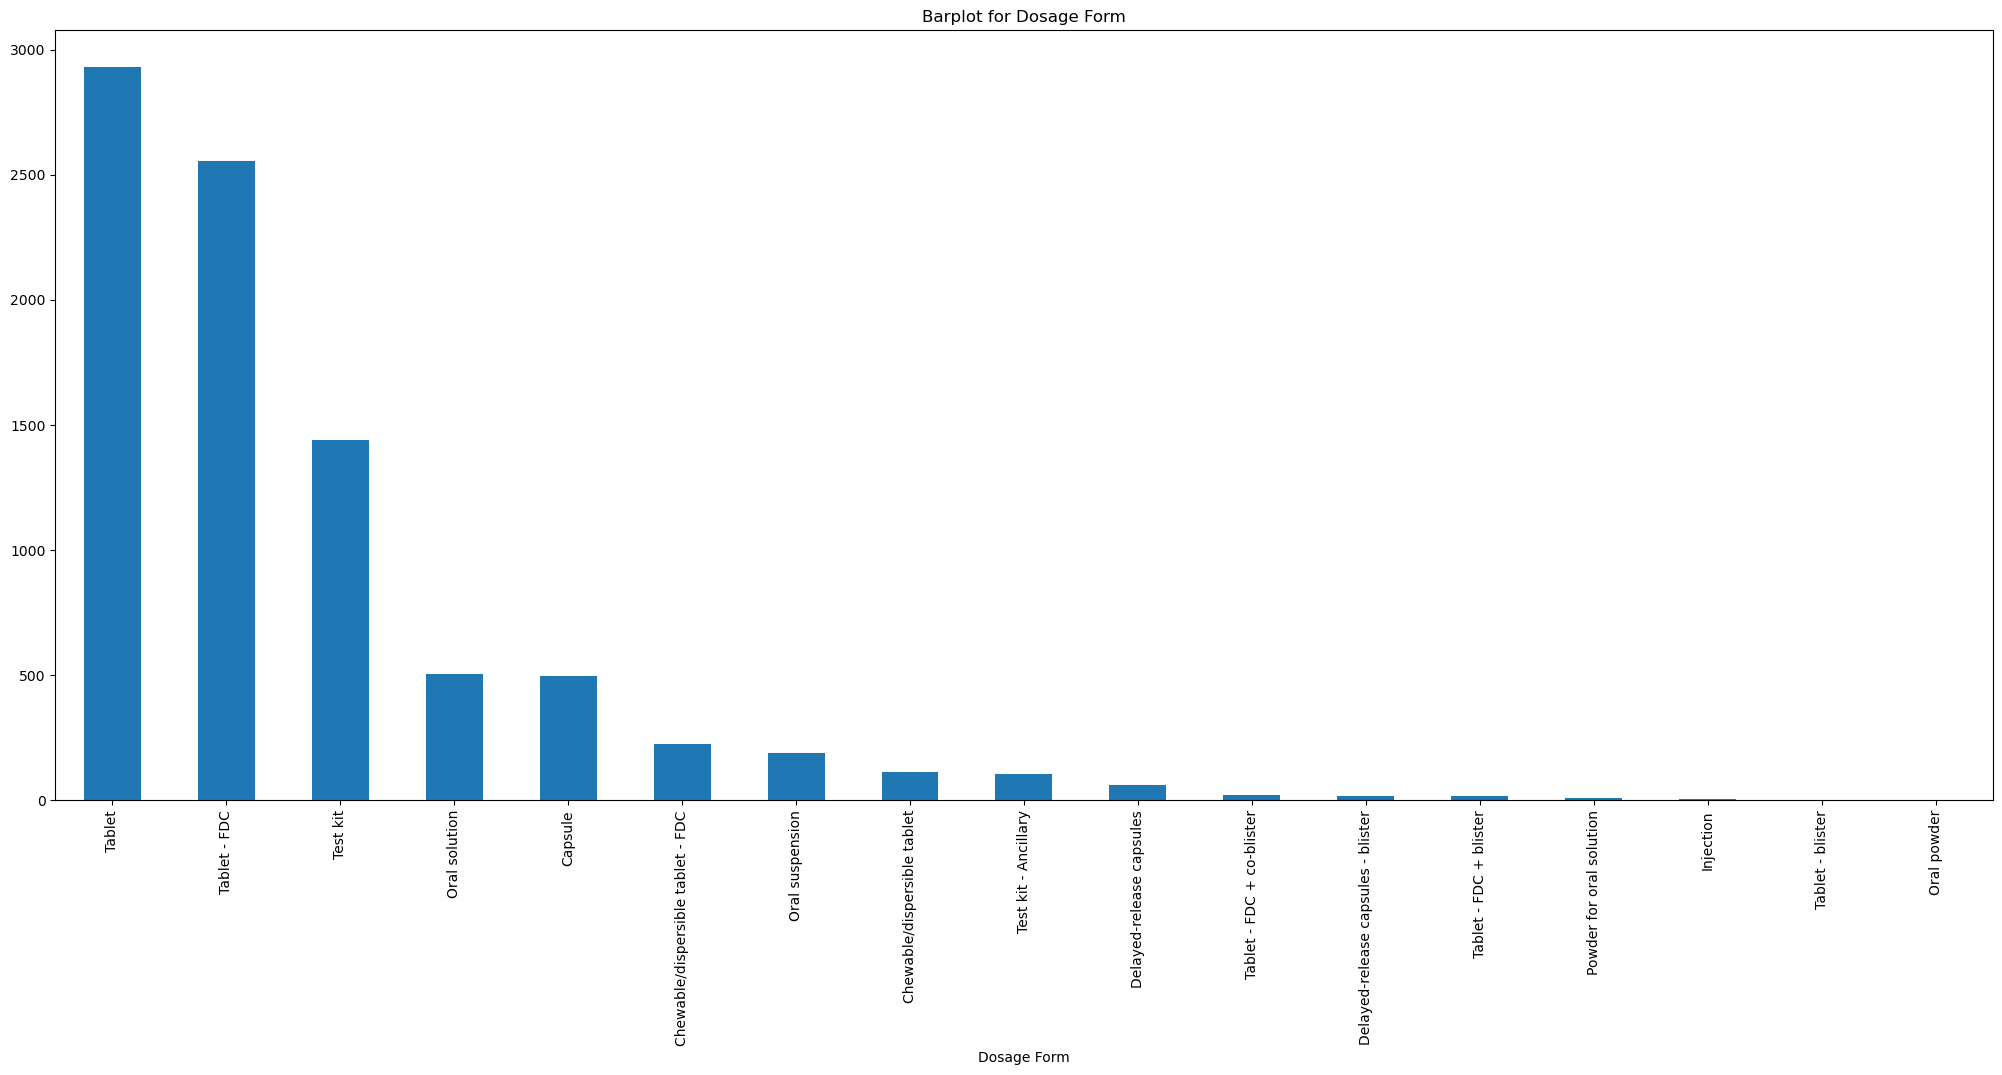

In [33]:
barplot(df['Dosage Form'],"Dosage Form")

<Axes: >

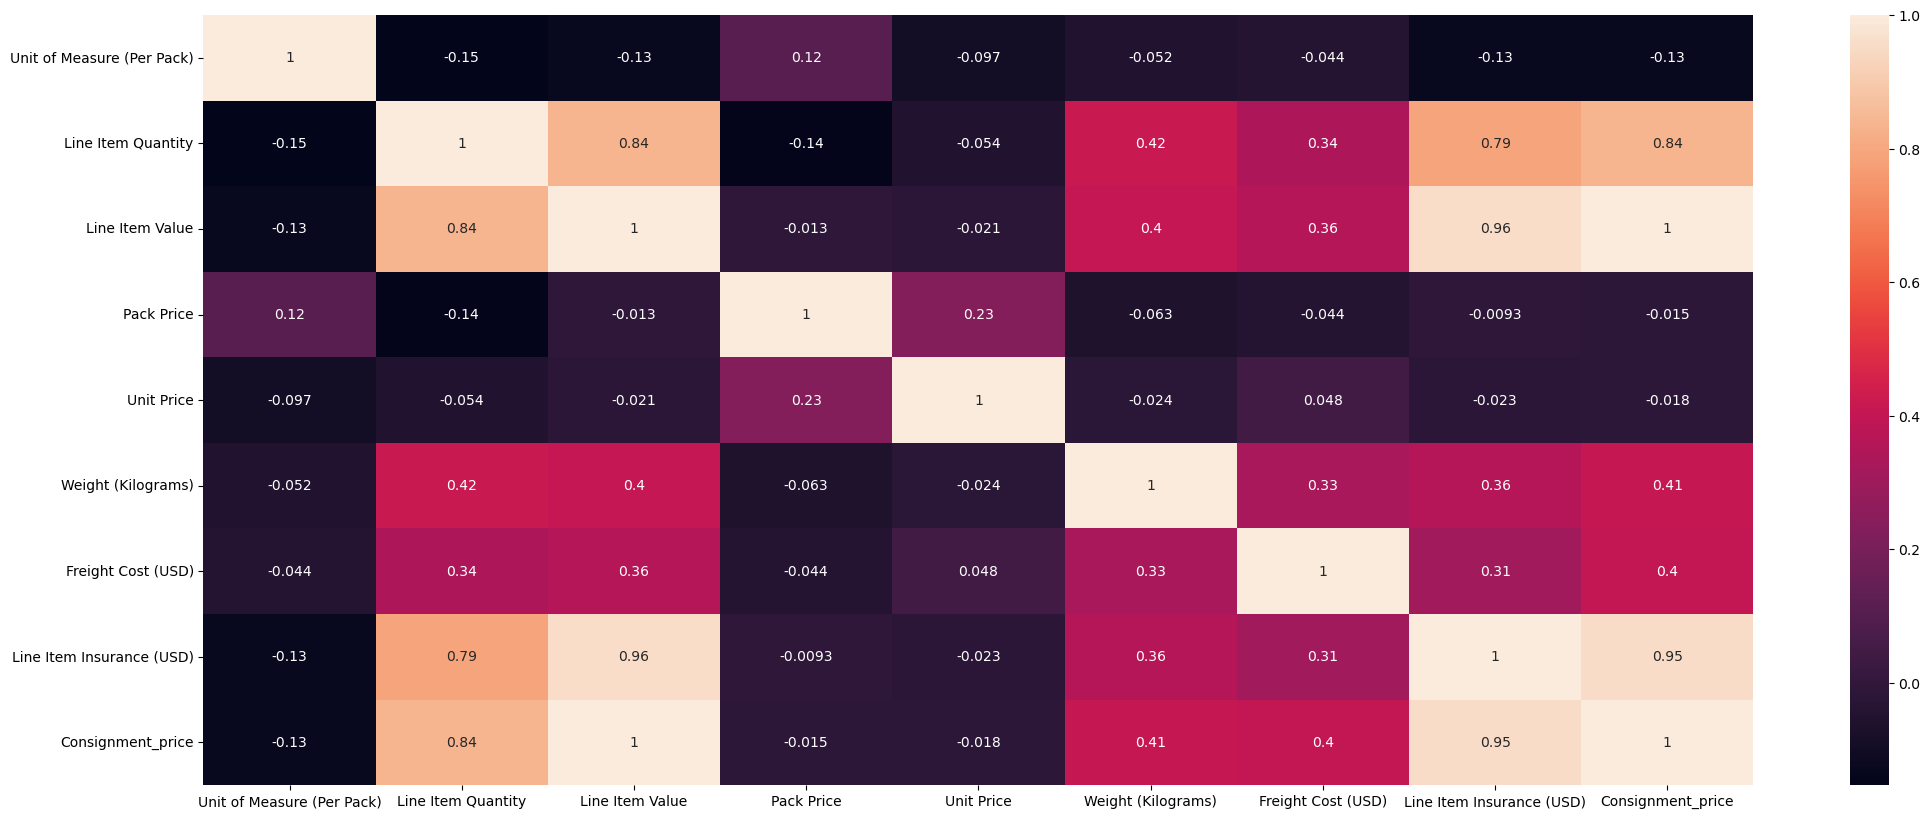

In [34]:
plt.figure(figsize=(25,10))
cor = df.select_dtypes(np.number).corr()
sns.heatmap(cor,annot=True)

Encoding Data

In [35]:
lr = LabelEncoder()

In [36]:
df['First Line Designation'] = lr.fit_transform(df[ 'First Line Designation'])
df['Shipment Mode'] = lr.fit_transform(df['Shipment Mode'])
df['Product Group'] = lr.fit_transform(df[ 'Product Group'])
df['Sub Classification'] = lr.fit_transform(df['Sub Classification'])

In [37]:
# dropping reduntant data tried with model before either importance is zero or very miniscule
df = df.drop(['PQ #','PO / SO #','ASN/DN #',
              'Project Code',
              'PQ First Sent to Client Date',
              'PO Sent to Vendor Date',
              'Vendor INCO Term',
              'Item Description',
              'Molecule/Test Type'], axis=1)


In [38]:
df = df.select_dtypes(exclude=['datetime64'])

In [39]:
df

,Country,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,Vendor,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Consignment_price
0,Côte d'Ivoire,PMO - US,Direct Drop,0,3,2,RANBAXY Fine Chemicals LTD.,Reveal,300mg,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,1,13.0,780.34,240.117626,1571.457626
1,Vietnam,PMO - US,Direct Drop,0,2,5,Aurobindo Pharma Limited,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",1,358.0,4521.50,240.117626,10961.617626
2,Côte d'Ivoire,PMO - US,Direct Drop,0,3,2,Abbott GmbH & Co. KG,Determine,300mg,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,1,171.0,1653.78,240.117626,41893.897626
3,Vietnam,PMO - US,Direct Drop,0,2,1,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",1,1855.0,16007.06,240.117626,143607.977626
4,Vietnam,PMO - US,Direct Drop,0,2,1,Aurobindo Pharma Limited,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",1,7590.0,45450.08,240.117626,167290.197626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317,Nigeria,PMO - US,From RDC,0,2,1,SCMS from RDC,Generic,600mg,Tablet,30,6724,20978.88,3.12,0.10,"Strides, Bangalore, India.",0,6183.0,47281.56,24.690000,68285.130000
10318,Zimbabwe,PMO - US,From RDC,3,2,5,SCMS from RDC,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,205243,738874.80,3.60,0.06,"Cipla, Goa, India",0,25880.0,46111.55,869.660000,785856.010000
10319,Zimbabwe,PMO - US,From RDC,3,2,5,SCMS from RDC,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",0,25880.0,46111.55,705.790000,646472.940000
10320,Côte d'Ivoire,PMO - US,From RDC,3,2,1,SCMS from RDC,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,0,4426.0,14734.92,161.710000,152286.070000


In [40]:
# normalising values for better model fit, also manages outliers

numeric_columns = ['Line Item Quantity', 'Line Item Value','Weight (Kilograms)','Freight Cost (USD)','Line Item Insurance (USD)','Consignment_price']


for column in numeric_columns:
    df[column], fitted_lambda = stats.boxcox(df[column] + 1) #Adding 1 to handle values that transform to 0 or less than 1

df


,Country,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,Vendor,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Consignment_price
0,Côte d'Ivoire,PMO - US,Direct Drop,0,3,2,RANBAXY Fine Chemicals LTD.,Reveal,300mg,Test kit,30,3.451585,9.392694,29.00,0.97,Ranbaxy Fine Chemicals LTD,1,3.001428,15.673382,6.615013,9.265269
1,Vietnam,PMO - US,Direct Drop,0,2,5,Aurobindo Pharma Limited,Generic,10mg/ml,Oral suspension,240,9.669939,15.311258,6.20,0.03,"Aurobindo Unit III, India",1,7.894638,25.569759,6.615013,12.476631
2,Côte d'Ivoire,PMO - US,Direct Drop,0,3,2,Abbott GmbH & Co. KG,Determine,300mg,Test kit,100,8.400185,21.181839,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,1,6.648321,19.423452,6.615013,14.923758
3,Vietnam,PMO - US,Direct Drop,0,2,1,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,Generic,150mg,Tablet,60,17.397524,25.538602,3.99,0.07,"Ranbaxy, Paonta Shahib, India",1,11.014522,35.597083,6.615013,17.353688
4,Vietnam,PMO - US,Direct Drop,0,2,1,Aurobindo Pharma Limited,Generic,30mg,Capsule,60,17.855926,25.352767,3.20,0.05,"Aurobindo Unit III, India",1,14.108175,46.360498,6.615013,17.667534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317,Nigeria,PMO - US,From RDC,0,2,1,SCMS from RDC,Generic,600mg,Tablet,30,13.614415,19.001312,3.12,0.10,"Strides, Bangalore, India.",0,13.631643,46.820542,3.621732,15.865843
10318,Zimbabwe,PMO - US,From RDC,3,2,5,SCMS from RDC,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,22.693466,33.407698,3.60,0.06,"Cipla, Goa, India",0,17.162778,46.528273,8.542753,21.016880
10319,Zimbabwe,PMO - US,From RDC,3,2,5,SCMS from RDC,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,22.052969,32.385245,3.60,0.06,"Mylan, H-12 & H-13, India",0,17.162778,46.528273,8.218422,20.576750
10320,Côte d'Ivoire,PMO - US,From RDC,3,2,1,SCMS from RDC,Generic,150/300mg,Tablet - FDC,60,16.334976,25.845120,6.52,0.11,Hetero Unit III Hyderabad IN,0,12.874405,34.847903,6.056571,17.473984


Model Selection

In [41]:
from catboost import CatBoostRegressor
from catboost import Pool
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'catboost'

In [ ]:
model = CatBoostRegressor(iterations=1000, depth=3, learning_rate=0.1, loss_function='RMSE', verbose=100, od_type='Iter', od_wait=20, l2_leaf_reg=3)
# Selecting Catboost Due to its ability to handle categorical data effectively also gave better accuracy tha others comparable to XGBoost

Selecting Training/Testing Data

In [ ]:
features = df.drop('Consignment_price', axis=1)

target = 'Consignment_price' 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

categorical_features = ['Country',
                        'Managed By',
                        'Fulfill Via',
                        'Product Group',
                        'Sub Classification',
                        'Vendor',
                        'Brand',
                        'Dosage',
                        'Dosage Form',
                        'Manufacturing Site'] 

train_data = Pool(X_train, label=y_train, cat_features=categorical_features)

Training Model

In [ ]:
model.fit(train_data)

0:	learn: 3.1599845	total: 13.5ms	remaining: 13.4s
100:	learn: 0.2247215	total: 1.51s	remaining: 13.5s
200:	learn: 0.1402530	total: 3s	remaining: 11.9s
300:	learn: 0.1116338	total: 4.95s	remaining: 11.5s
400:	learn: 0.0961463	total: 6.89s	remaining: 10.3s
500:	learn: 0.0861838	total: 8.8s	remaining: 8.77s
600:	learn: 0.0794581	total: 10.6s	remaining: 7.05s
700:	learn: 0.0738882	total: 12.6s	remaining: 5.36s
800:	learn: 0.0692371	total: 14s	remaining: 3.48s
900:	learn: 0.0650875	total: 15.4s	remaining: 1.69s
999:	learn: 0.0616006	total: 16.7s	remaining: 0us


Testing Model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.008313462754537702


Feature Importance

In [ ]:
feature_importance = model.get_feature_importance()
print("Feature Importances:")
for feature_name, importance in zip(features.columns, feature_importance):
    print(f"{feature_name}: {importance}")

Feature Importances:
Country: 0.0032756423627274115
Managed By: 0.0
Fulfill Via: 4.569650366004597e-05
Shipment Mode: 0.005889667006275587
Product Group: 0.0001780242551625727
Sub Classification: 0.01650365335154994
Vendor: 0.0007495207380807609
Brand: 0.00018064306747416506
Dosage: 0.0016915059632813072
Dosage Form: 0.001056948749375675
Unit of Measure (Per Pack): 0.006140933264868079
Line Item Quantity: 0.9547941436707603
Line Item Value: 71.31908136245035
Pack Price: 0.05477196223130554
Unit Price: 0.03973398395189432
Manufacturing Site: 0.0002091141575247302
First Line Designation: 0.0006220144072781481
Weight (Kilograms): 2.3968183178992493
Freight Cost (USD): 10.463539107989096
Line Item Insurance (USD): 14.734717757980063


In [ ]:
import pickle
pickle.dump(model, open("consignment_pricing.pkl","wb"))